### 1. Perform the following:

a. Read and display image.

b. Resize a given image.

c. Convert a given color image into a corresponding gray-scale image.

d. Convert a given color/gray-scale image into black & white image.

e. Separate a given color image into three R G & B planes.

f. Create a color image using separate three R, G and B planes.

g. Write given 2-D data in image file.

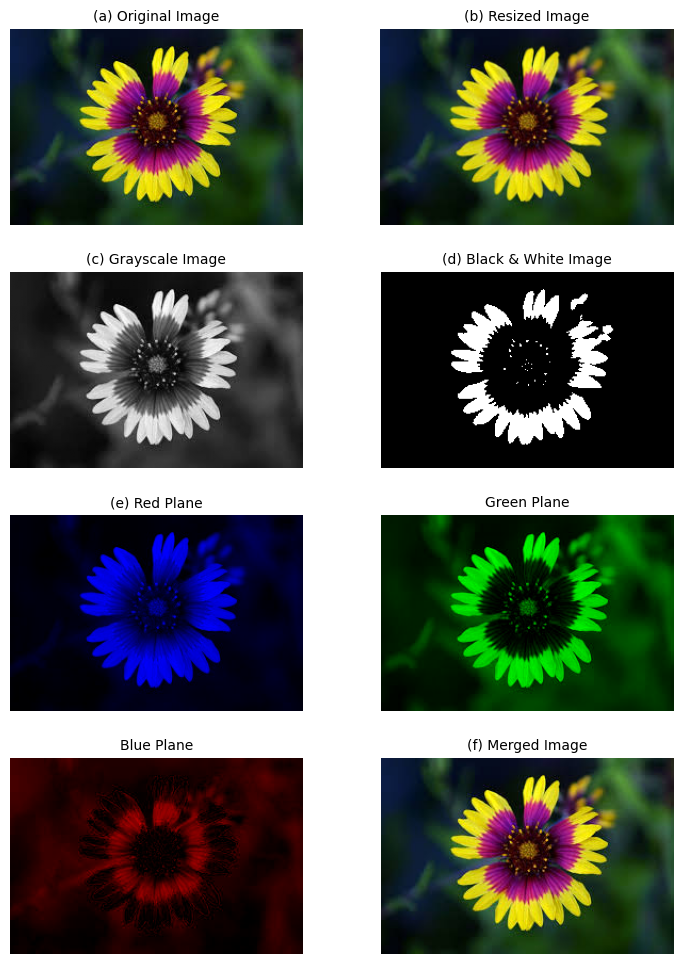

✅ Random 2D image saved successfully!


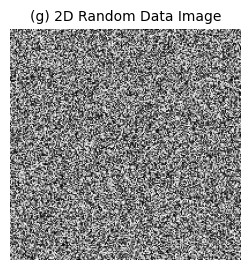

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load Image ---
img = cv2.imread("flower.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for Matplotlib

# --- Resize ---
resized = cv2.resize(img, (300, 200))
resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

# --- Grayscale ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Black & White ---
_, bw = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# --- RGB Channels ---
b, g, r = cv2.split(img)
r_rgb = cv2.merge([r, np.zeros_like(g), np.zeros_like(b)])
g_rgb = cv2.merge([np.zeros_like(r), g, np.zeros_like(b)])
b_rgb = cv2.merge([np.zeros_like(r), np.zeros_like(g), b])
r_rgb = cv2.cvtColor(r_rgb, cv2.COLOR_BGR2RGB)
g_rgb = cv2.cvtColor(g_rgb, cv2.COLOR_BGR2RGB)
b_rgb = cv2.cvtColor(b_rgb, cv2.COLOR_BGR2RGB)

# --- Merged back ---
merged = cv2.merge((b, g, r))
merged_rgb = cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)

# --- Plot all images without axes ---
fig, axes = plt.subplots(4, 2, figsize=(8, 10))  # Increased figure size

images = [
    (img_rgb, "(a) Original Image"),
    (resized_rgb, "(b) Resized Image"),
    (gray, "(c) Grayscale Image"),
    (bw, "(d) Black & White Image"),
    (r_rgb, "(e) Red Plane"),
    (g_rgb, "Green Plane"),
    (b_rgb, "Blue Plane"),
    (merged_rgb, "(f) Merged Image")
]

for ax, (image, title) in zip(axes.ravel(), images):
    ax.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    ax.set_title(title, fontsize=10)   # smaller title font
    ax.axis('off')                     # hide axes

plt.tight_layout(pad=2.0)
plt.show()

# --- Write 2D random data as image ---
data = np.random.randint(0, 255, (200, 200), dtype=np.uint8)
cv2.imwrite("random_image.png", data)
print("✅ Random 2D image saved successfully!")
# --- Display the Random Image ---
plt.figure(figsize=(3, 3))
plt.imshow(data, cmap='gray')
plt.title("(g) 2D Random Data Image", fontsize=10)
plt.axis('off')
plt.show()

### 2. To write and execute image processing programs using point processing method:

a. Obtain Negative image

b. Obtain Flip image

c. Thresholding

d. Contrast stretching


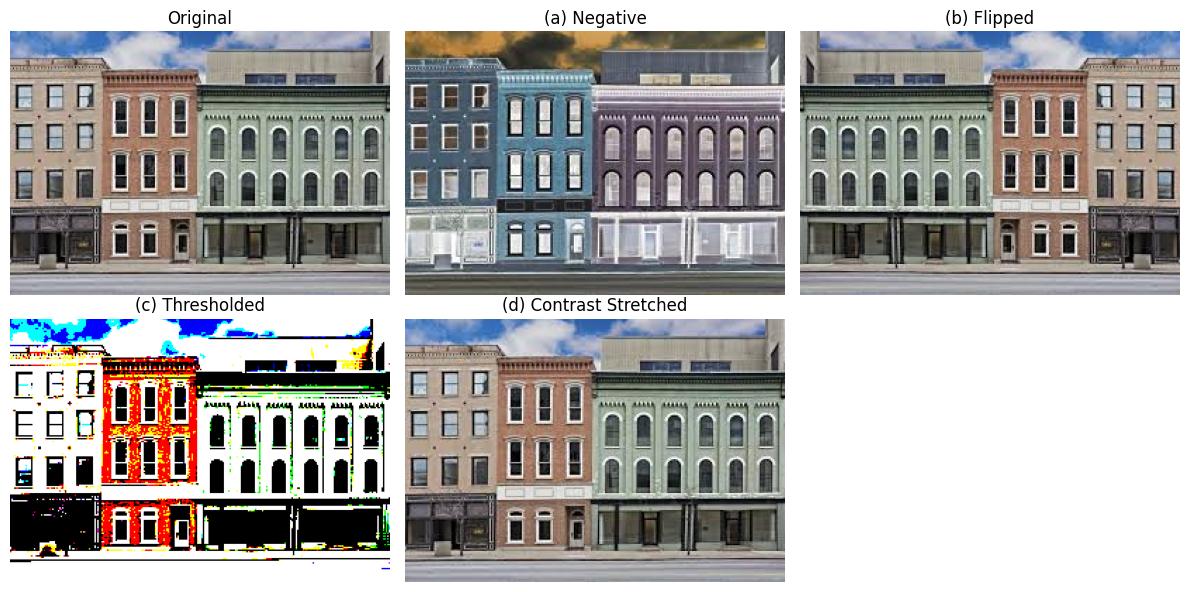

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
img2 = cv2.imread("buildings.jpg")
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# (a) Negative
negative = 255 - img2_rgb

# (b) Flip (horizontal)
flip = cv2.flip(img2_rgb, 1)

# (c) Thresholding
_, th = cv2.threshold(img2_rgb, 128, 255, cv2.THRESH_BINARY)

# (d) Contrast Stretching
min_val, max_val = np.min(img2_rgb), np.max(img2_rgb)
contrast_stretch = ((img2_rgb - min_val) / (max_val - min_val) * 255).astype(np.uint8)

# Plot all
titles = ["Original", "(a) Negative", "(b) Flipped", "(c) Thresholded", "(d) Contrast Stretched"]
images = [img2_rgb, negative, flip, th, contrast_stretch]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=12)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 3. To write and execute programs for image arithmetic operations:

a. Addition of two images

b. Subtract one image from other image

c. Calculate mean value of image

d. Different Brightness by changing mean value

(c) Mean Pixel Value: (60.9348814229249, 0.0, 0.0, 0.0)


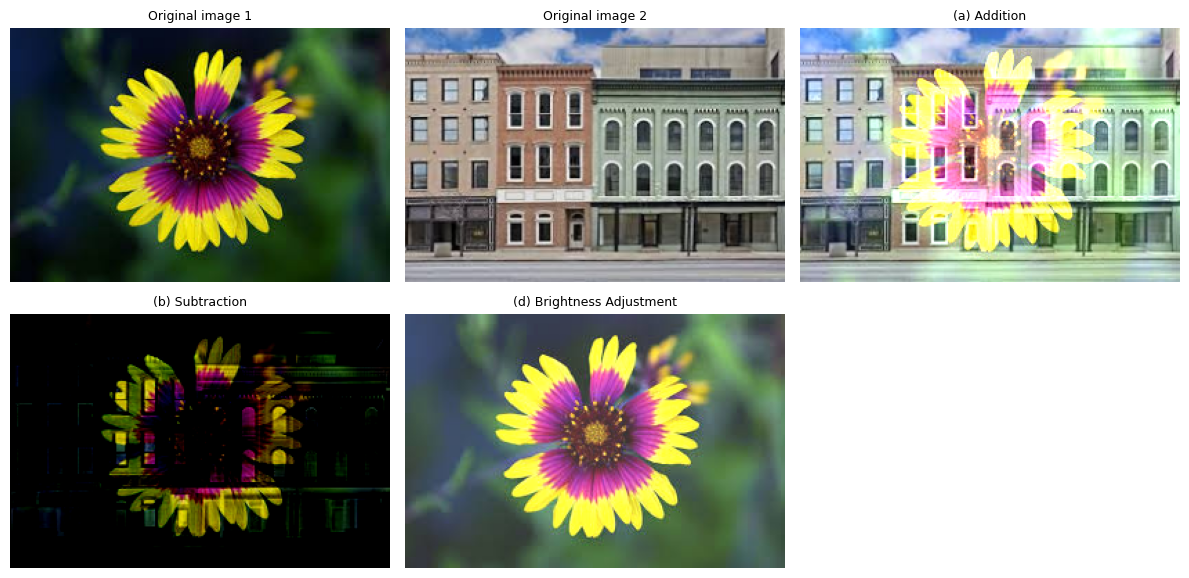

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("flower.jpg")
img2 = cv2.imread("buildings.jpg")
img2 = cv2.resize(img2, img1.shape[1::-1])  # Match size

# (a) Addition
add = cv2.add(img1, img2)

# (b) Subtraction
sub = cv2.subtract(img1, img2)

# (c) Mean Value
mean_val = cv2.mean(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY))
print("(c) Mean Pixel Value:", mean_val)

# (d) Brightness Adjustment
bright = cv2.convertScaleAbs(img1, alpha=1, beta=50)

# Convert for matplotlib
images = [img1[..., ::-1], img2[..., ::-1], add[..., ::-1], sub[..., ::-1], bright[..., ::-1]]
titles = ["Original image 1","Original image 2", "(a) Addition", "(b) Subtraction", "(d) Brightness Adjustment"]

plt.figure(figsize=(12, 6))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 4. To write and execute programs for image logical operations:

a. AND operation between two images

b. OR operation between two images

c. Calculate intersection of two images

d. Water Marking using X-OR operation

e. NOT operation (Negative image)

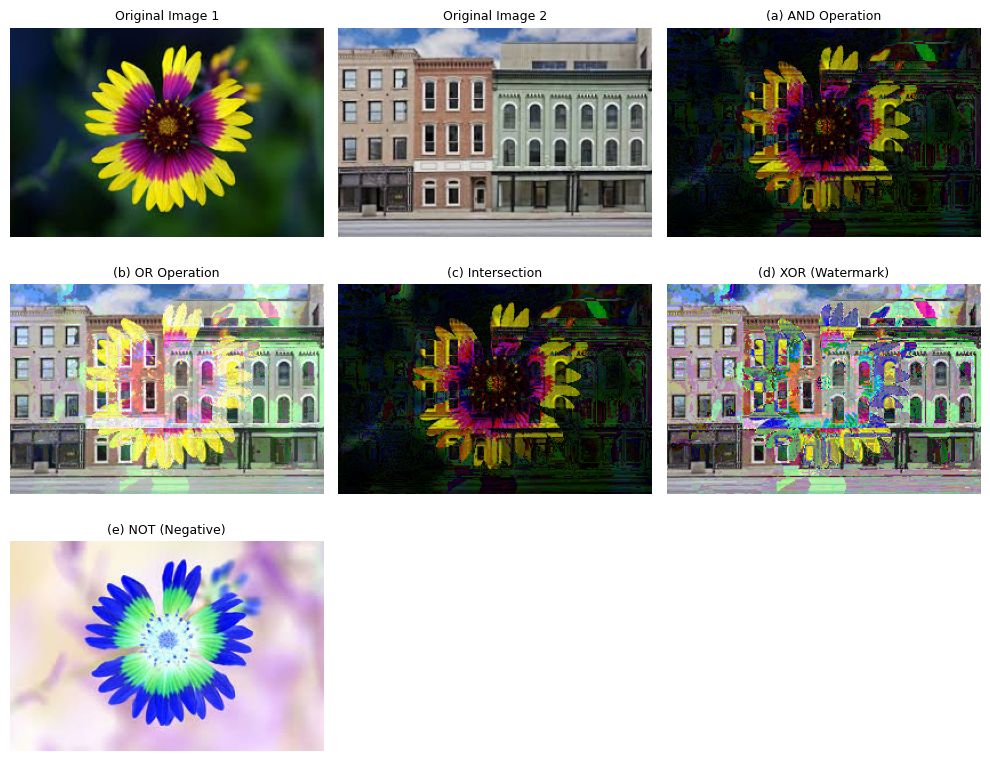

(c) Intersection Pixel Count: 49781


In [ ]:
import cv2
import matplotlib.pyplot as plt

# --- Load color images ---
img1 = cv2.imread("flower.jpg")
img2 = cv2.imread("buildings.jpg")
img2 = cv2.resize(img2, img1.shape[1::-1])  # Match size

# --- Perform bitwise operations (color images) ---
and_img = cv2.bitwise_and(img1, img2)
or_img = cv2.bitwise_or(img1, img2)
intersection = cv2.bitwise_and(img1, img2)
xor_img = cv2.bitwise_xor(img1, img2)
not_img = cv2.bitwise_not(img1)

# --- Convert BGR → RGB for Matplotlib display ---
images = [
    img1[..., ::-1], img2[..., ::-1],
    and_img[..., ::-1], or_img[..., ::-1],
    intersection[..., ::-1], xor_img[..., ::-1],
    not_img[..., ::-1]
]
titles = [
    "Original Image 1",
    "Original Image 2",
    "(a) AND Operation",
    "(b) OR Operation",
    "(c) Intersection",
    "(d) XOR (Watermark)",
    "(e) NOT (Negative)"
]

# --- Display all images ---
plt.figure(figsize=(10, 8))
for i in range(7):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Count intersection pixels (nonzero overlap)
intersection_value = np.count_nonzero(cv2.cvtColor(intersection, cv2.COLOR_BGR2GRAY))
print(f"(c) Intersection Pixel Count: {intersection_value}")

### 5. To write and execute a program for histogram calculation and equalization:

a. Using inbuilt function

b. Without using inbuilt function

C:\Users\hardi\AppData\Local\Temp\ipykernel_13588\3778868575.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])
C:\Users\hardi\AppData\Local\Temp\ipykernel_13588\3778868575.py:16: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(eq.ravel(), 256, [0, 256])


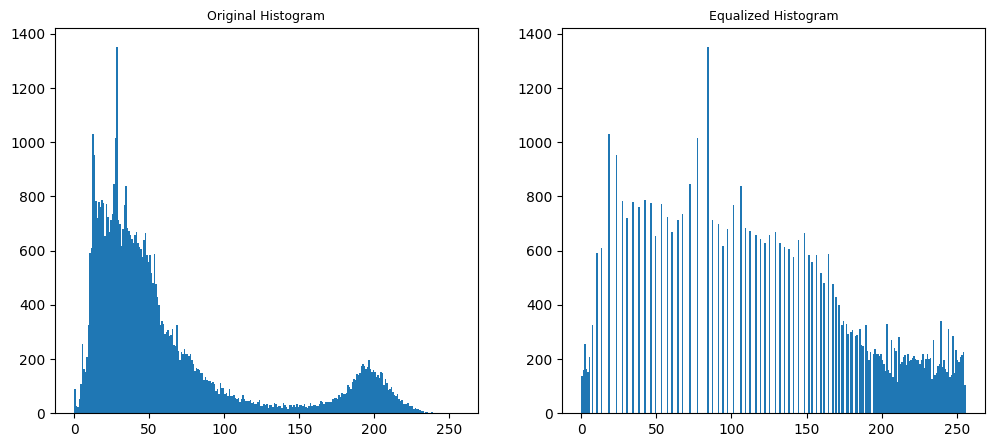

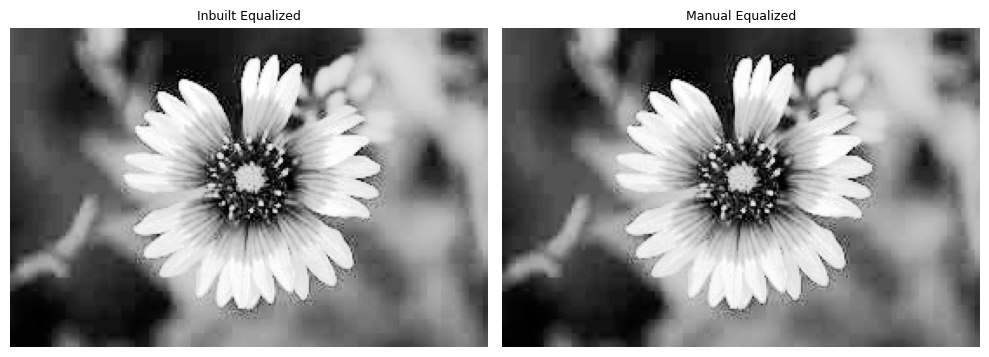

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("flower.jpg", 0)

# (a) Using inbuilt function
eq = cv2.equalizeHist(img)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Original Histogram", fontsize=9)

plt.subplot(1, 2, 2)
plt.hist(eq.ravel(), 256, [0, 256])
plt.title("Equalized Histogram", fontsize=9)
plt.show()

# (b) Manual equalization
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img_eq_manual = cdf[img]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(eq, cmap='gray')
plt.title("Inbuilt Equalized", fontsize=9)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_eq_manual, cmap='gray')
plt.title("Manual Equalized", fontsize=9)
plt.axis('off')
plt.tight_layout()
plt.show()


### 6. To write and execute a program performing the following geometric transformations on an image:

a. Translation

b. Scaling

c. Rotation

d. Shrinking

e. Zooming

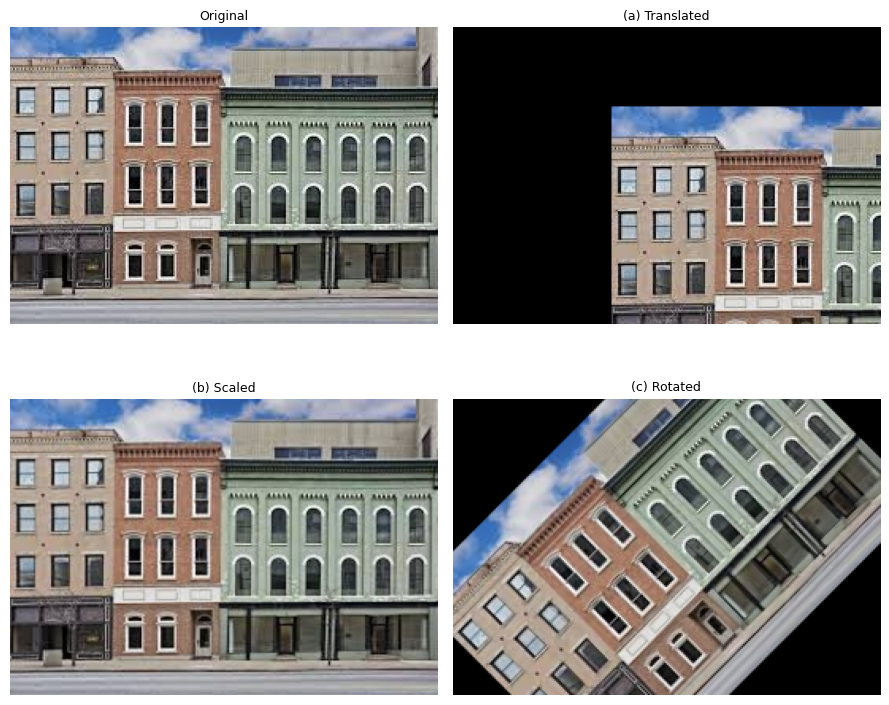

(d) Shrinking:


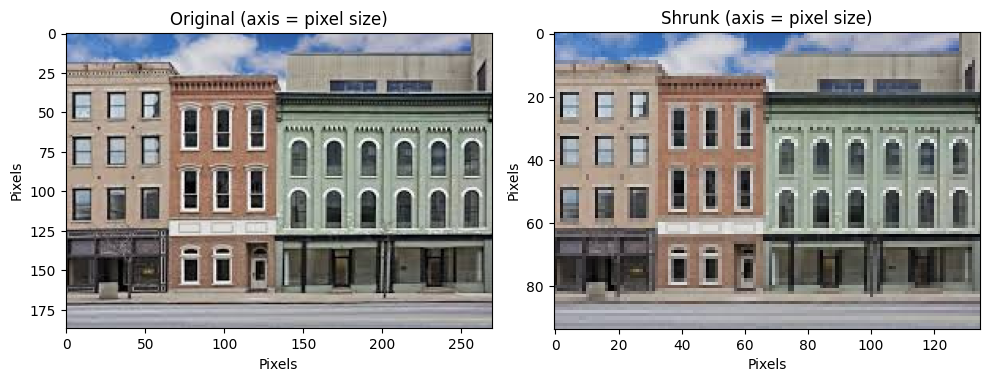

(e) Zooming:


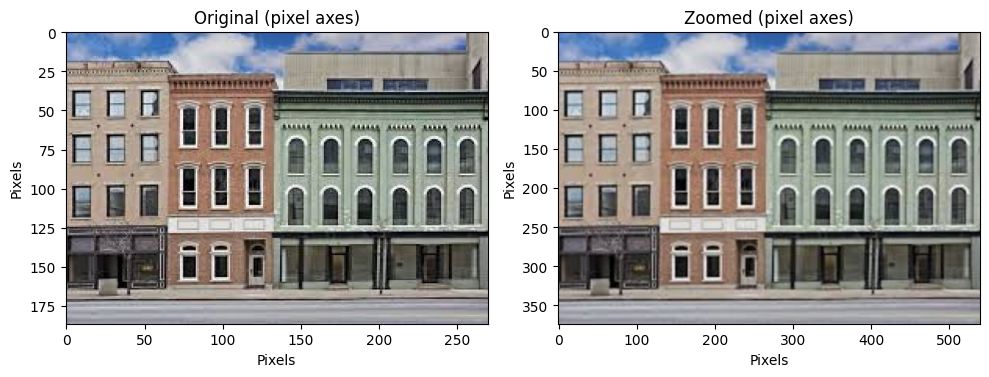

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("buildings.jpg")
rows, cols = img.shape[:2]

# (a) Translation
M = np.float32([[1, 0, 100], [0, 1, 50]])
translated = cv2.warpAffine(img, M, (cols, rows))

# (b) Scaling
scaled = cv2.resize(img, None, fx=1.5, fy=1.5)

# (c) Rotation
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated = cv2.warpAffine(img, M, (cols, rows))

# (d) Shrinking
shrunk = cv2.resize(img, None, fx=0.5, fy=0.5)

# (e) Zooming
zoomed = cv2.resize(img, None, fx=2, fy=2)

images = [img[..., ::-1], translated[..., ::-1], scaled[..., ::-1],
           rotated[..., ::-1]]
titles = ["Original", "(a) Translated", "(b) Scaled", "(c) Rotated"]

plt.figure(figsize=(9, 8))
for i in range(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()

# --- Plot for Shrinking (axis = pixel size) ---
print("(d) Shrinking:")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original (axis = pixel size)")
plt.xlabel("Pixels")
plt.ylabel("Pixels")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(shrunk, cv2.COLOR_BGR2RGB))
plt.title("Shrunk (axis = pixel size)")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.tight_layout()
plt.show()

# --- Plot for Zooming (pixel axes) ---
print("(e) Zooming:")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original (pixel axes)")
plt.xlabel("Pixels")
plt.ylabel("Pixels")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(zoomed, cv2.COLOR_BGR2RGB))
plt.title("Zoomed (pixel axes)")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.tight_layout()
plt.show()